In [1]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [2]:
ds_name = "DM_15_09_18"
classe = "313"

latex_info = {}
latex_info['titre'] = "DM 1"  
latex_info['classe'] = "313"
latex_info['date'] = "18 septembre 2015"
latex_info

{'classe': '313', 'date': '18 septembre 2015', 'titre': 'DM 1'}

# Import et premiers traitements

In [5]:
notes = pd.ExcelFile("./../../../313_.xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

AssertionError: 

In [8]:
notes.index

NameError: name 'notes' is not defined

In [124]:
notes = notes.T

In [125]:
notes = notes.drop('av_arrondi', axis=1)
notes = notes.drop('num_sujet', axis=1)

In [126]:
barem = notes[:1]
notes = notes[1:]
#notes

## Supression des notes inutiles 

In [127]:
notes = notes[notes[ds_name].notnull()]
notes = notes[notes[ds_name] != 'abs']

In [128]:
notes = notes.astype(float)

## Traitement des notes

In [129]:
notes.T.index

Index(['DM_0506', 'Malus', 'Exercice 1', '1.1.a', '1.1.b', '1.1.c', '1.2.a',
       '1.2.b', '1.2.c', '1.2.d', '1.3.a', '1.3.b', '1.3.c', '1.3.d',
       'Exercice 2', '2.1', '2.2', '2.3', 'Exercice 3', '3.1.a', '3.1.b',
       '3.1.c', '3.1.d', '3.2.a', '3.2.b', '3.2.c', '3.2.d'],
      dtype='object')

In [130]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3"]

In [131]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [132]:
item_avec_note = list_exo + [ds_name,  "Malus"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1.1.a',
 '1.1.b',
 '1.1.c',
 '1.2.a',
 '1.2.b',
 '1.2.c',
 '1.2.d',
 '1.3.a',
 '1.3.b',
 '1.3.c',
 '1.3.d',
 '2.1',
 '2.2',
 '2.3',
 '3.1.a',
 '3.1.b',
 '3.1.c',
 '3.1.d',
 '3.2.a',
 '3.2.b',
 '3.2.c',
 '3.2.d']

In [133]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [134]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [135]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [136]:
len(notes.T.index)

27

# Preparation du fichier .tex

In [157]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [138]:
notes[ds_name].describe()

count    28.000000
mean     14.696429
std       5.894661
min       0.000000
25%      14.375000
50%      16.500000
75%      18.625000
max      20.000000
Name: DM_0506, dtype: float64

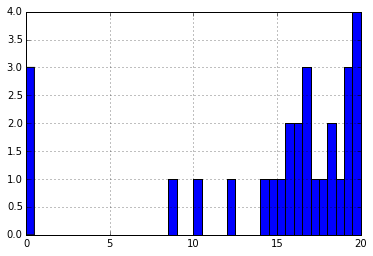

In [139]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [154]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [155]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1.1.a  1.1.b  1.1.c  1.2.a  1.2.b  1.2.c  1.2.d  1.3.a  1.3.b  1.3.c  \
count     25     25     25     25    NaN    NaN    NaN     25     25    NaN   

       ...    2.2  2.3  3.1.a  3.1.b  3.1.c  3.1.d  3.2.a  3.2.b  3.2.c  3.2.d  
count  ...    NaN   25    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  

[1 rows x 22 columns]